<a href="https://colab.research.google.com/github/akashshukla7458/spamsms/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [6]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'messages'])
df

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['label'] = df.label.map({'ham' : 0, 'spam' : 1})

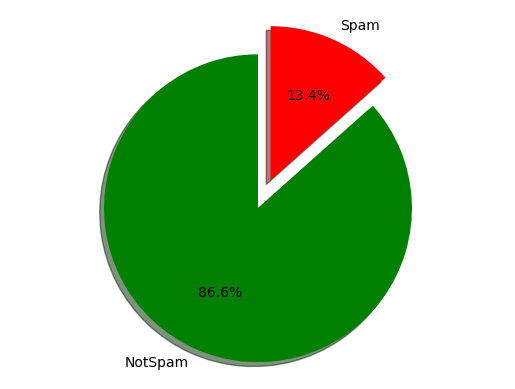

In [8]:
count_Class = pd.value_counts(df.label, sort = True)

# Data to Plot
labels = 'NotSpam', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = tts(df['messages'], df['label'], test_size=0.2, random_state=1)
     
     

In [10]:
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [11]:
Mnb = MultinomialNB()
Mnb.fit(train_data, y_train)

MultinomialNB()

In [13]:
MnbPredicts = Mnb.predict(test_data)

In [14]:
print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, MnbPredicts) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, MnbPredicts)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, MnbPredicts)* 100))


The accuracy of our Naïve Bayes multinomial model is 99.01345291479821 %
The Precision of our Naïve Bayes multinomial model is 97.88732394366197 %
The Recall of our Naïve Bayes multinomial model is 94.5578231292517 %


In [16]:
confusionmatrix = confusion_matrix(y_test, MnbPredicts)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_score(y_test, MnbPredicts) * 100))
print("\n", confusionmatrix)

The accuracy of Naive Bayes clasifier is 99.01345291479821%

 [[965   3]
 [  8 139]]


In [19]:
new_test_sample_ham = ["Hi, I'm Akash Shukla and I am glad to share my model"]

In [20]:
new_test_sample_spam= ["Congratulations, you've won a free Sony camera."]

In [21]:
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)

In [22]:
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [23]:
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [24]:
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
sample_predict
     

array([1])